In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./digit-recognizer/train.csv')

In [4]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.size

32970000

In [12]:
data = np.array(data)
m,n = data.shape
#shuffling before splitting into dev and training sets
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
#this is element wise division and not a matrix division hence the dot
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape


In [9]:
data.shape

(42000, 785)

In [13]:
Y_train

array([4, 8, 7, ..., 1, 5, 4], dtype=int64)

In [14]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 9 4 ... 4 4 6] [4 8 7 ... 1 5 4]
0.091
Iteration:  10
[9 9 8 ... 3 3 6] [4 8 7 ... 1 5 4]
0.19478048780487806
Iteration:  20
[1 3 8 ... 3 3 7] [4 8 7 ... 1 5 4]
0.28948780487804876
Iteration:  30
[1 3 8 ... 1 3 7] [4 8 7 ... 1 5 4]
0.3738048780487805
Iteration:  40
[1 1 8 ... 1 3 6] [4 8 7 ... 1 5 4]
0.43802439024390244
Iteration:  50
[1 1 8 ... 1 3 6] [4 8 7 ... 1 5 4]
0.4799024390243902
Iteration:  60
[1 1 8 ... 1 3 6] [4 8 7 ... 1 5 4]
0.5119024390243903
Iteration:  70
[1 1 8 ... 1 3 6] [4 8 7 ... 1 5 4]
0.5397073170731708
Iteration:  80
[1 1 7 ... 1 3 6] [4 8 7 ... 1 5 4]
0.5660243902439024
Iteration:  90
[1 1 7 ... 1 3 6] [4 8 7 ... 1 5 4]
0.5885121951219512
Iteration:  100
[1 1 7 ... 1 3 6] [4 8 7 ... 1 5 4]
0.6105853658536585
Iteration:  110
[4 1 7 ... 1 3 4] [4 8 7 ... 1 5 4]
0.6309024390243902
Iteration:  120
[4 1 7 ... 1 3 4] [4 8 7 ... 1 5 4]
0.6481219512195122
Iteration:  130
[4 1 7 ... 1 3 4] [4 8 7 ... 1 5 4]
0.6653170731707317
Iteration:  140
[4 1 7 ... 

In [17]:
#getting an accuracy of 82%

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


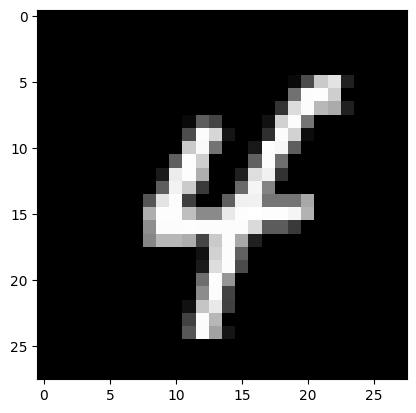

Prediction:  [8]
Label:  8


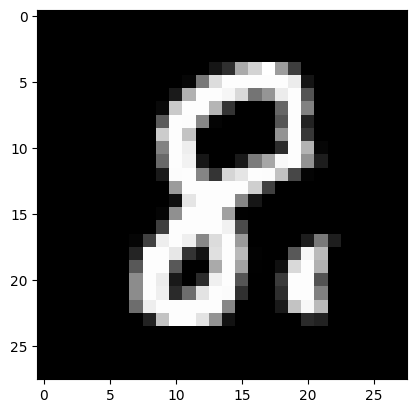

Prediction:  [7]
Label:  7


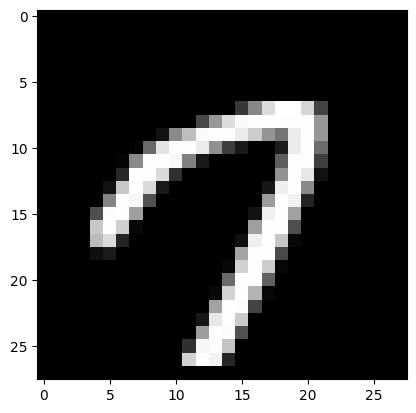

Prediction:  [1]
Label:  1


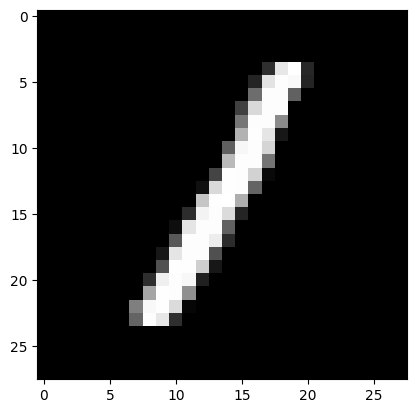

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [20]:
#accuracy on the dev set

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)



[8 8 6 8 0 1 0 9 6 6 5 2 6 5 0 2 9 0 8 0 7 7 1 5 2 3 1 9 7 4 3 0 0 5 5 9 3
 7 8 6 7 8 4 2 4 7 0 3 6 7 4 1 0 2 3 6 6 1 1 1 2 3 6 4 6 7 2 2 9 3 3 3 5 2
 4 7 7 9 0 7 2 0 2 1 1 0 7 1 2 0 1 6 0 4 1 2 0 7 2 2 6 3 6 0 8 1 5 2 3 6 4
 3 1 8 6 3 8 4 9 2 2 0 7 3 8 7 1 3 5 6 5 0 0 4 7 2 6 4 9 5 4 8 0 0 3 1 7 9
 1 9 8 6 9 8 0 6 5 6 2 2 2 5 6 9 9 6 0 2 6 0 3 0 5 3 2 5 0 0 1 0 6 5 4 0 1
 9 7 4 9 1 7 0 3 2 4 2 6 7 1 0 8 4 1 6 2 3 7 7 5 0 6 3 6 7 6 6 9 5 0 3 6 8
 4 8 5 2 0 6 0 4 2 6 0 5 3 2 8 4 6 3 9 4 6 7 0 0 3 1 0 1 3 7 2 1 1 2 4 4 9
 1 2 9 2 0 7 8 7 6 5 1 2 8 5 7 1 4 3 1 6 9 0 5 4 8 7 2 0 1 1 8 4 4 3 0 8 0
 7 3 7 8 6 5 4 9 4 0 8 2 8 3 5 6 9 8 1 3 2 4 1 3 6 8 9 4 3 7 1 4 8 3 3 3 7
 3 4 9 2 8 1 3 7 7 3 7 8 5 7 7 7 6 9 5 1 1 5 8 7 5 2 1 3 4 4 7 8 4 7 7 6 2
 8 5 0 7 0 5 9 9 9 8 8 6 6 8 9 8 0 3 3 5 6 5 6 0 7 6 0 4 9 4 0 0 8 5 4 4 6
 6 7 9 3 2 8 0 6 0 0 8 8 1 0 3 7 4 5 7 2 7 0 8 0 3 0 8 1 0 6 0 2 4 1 1 5 9
 4 4 1 6 3 7 7 1 5 7 2 7 7 0 3 2 1 8 7 3 0 2 4 3 9 8 8 9 3 7 2 1 4 2 6 7 2
 0 7 4 7 8 9 7 8 5 1 4 3 

0.848

In [21]:
#here the accuracy is 84.8%